In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [3]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from dataset import Dataset
import numpy as np
from scipy.signal import periodogram

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [4]:
dataset = Dataset('../data/dataset/', header = None)

In [5]:
ts = dataset['stl_example.csv']

<Axes: xlabel='0'>

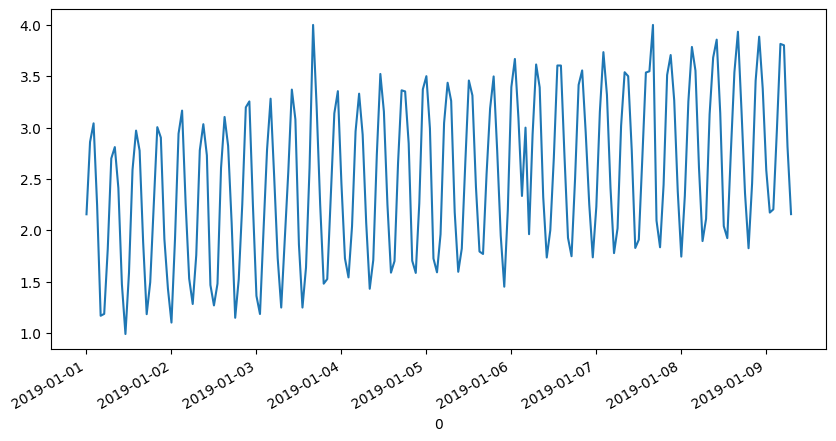

In [6]:
ts.plot(figsize = (10,5))

<Axes: xlabel='0'>

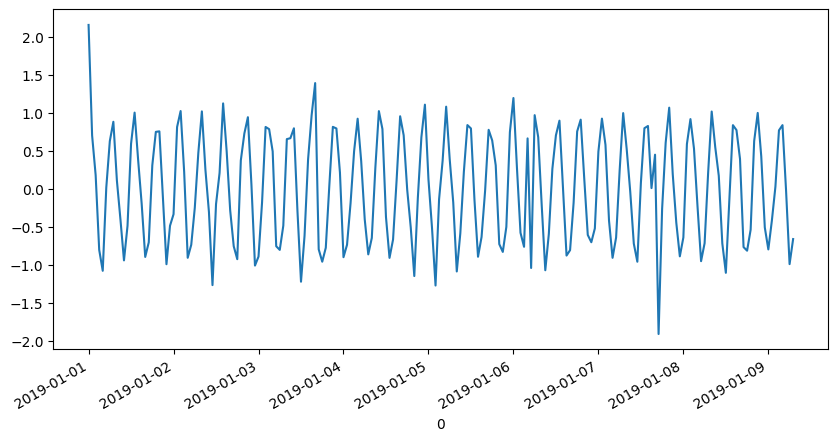

In [7]:
ts.diff().plot(figsize = (10,5))

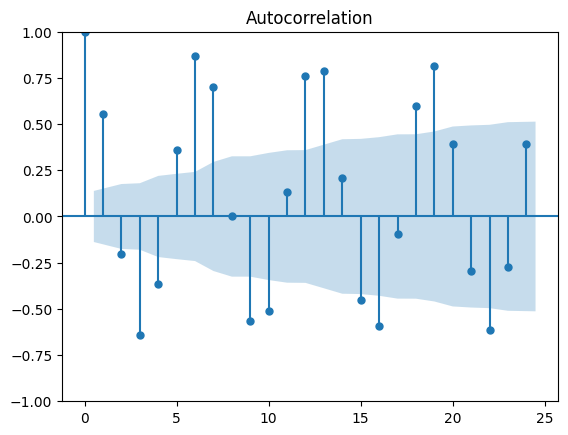

In [8]:
plot_acf(ts);

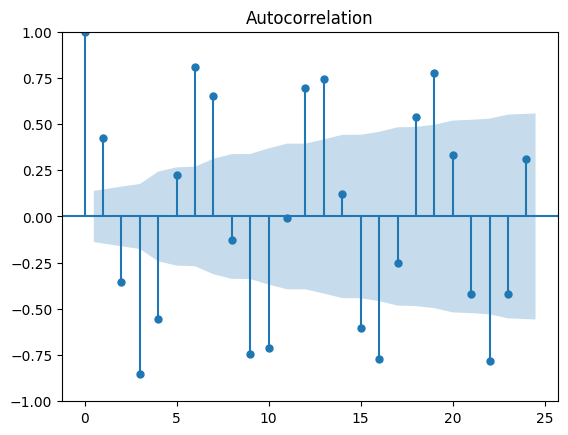

In [9]:
plot_acf(ts.diff().dropna());

In [10]:
def find_seasonal_period_acf(ts, threshold = 0.5):
    lag_acf = acf(ts, nlags=len(ts)//2)
    # Ищем первый значительный пик в ACF, кроме нулевого лага
    for i in range(1, len(lag_acf)):
        if lag_acf[i] > threshold:
            return i
    return None

In [11]:
find_seasonal_period_acf(ts.diff().dropna())

6

In [12]:
def find_seasonal_period_periodogram(ts):
    freqs, power = periodogram(ts)
    # Находим частоту с максимальной амплитудой
    peak_freq = freqs[np.argmax(power[1:]) + 1]
    # Переводим частоту в период
    if peak_freq > 0:
        return int(round(1 / peak_freq))
    return None

In [13]:
find_seasonal_period_periodogram(ts.diff().dropna())

6

In [14]:
def get_seasonal_period(ts, method):
    """
    ts: временной ряд,
    method: acf or periodgram
    """
    if method == 'acf':
        period = find_seasonal_period_acf(ts)
    elif method == 'periodgram':
        period = find_seasonal_period_periodogram(ts)

    return period

In [15]:
get_seasonal_period(ts.diff().dropna(), 'acf')

6